In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np

from interpreter.gate import GateBasedInterpreter
from interpreter.adiabatic import AdiabaticInterpreter
from interpreter.compress import Compress

/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)



*** INFO ***

locality mode = 5
compress mode = Compress.no
qubit map = None
# of gates = 8
# of computation qubits (n) = 2
# of clock qubits (L) = 8
# of ending identities = 0

*** END OF INFO ***

2 = n, 8 = L


  0%|          | 0/10 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:302: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/opt/homebrew/Caskroom/miniconda/base/envs/quantum/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 10/10 [00:04<00:00,  2.30it/s]


{'0111000000': 7, '0011000000': 6, '1111100000': 6, '1011110000': 42, '0011100000': 13, '0010000000': 24, '1011111000': 98, '1011111110': 139, '0111111000': 89, '1111111100': 78, '0011110000': 31, '0111100000': 40, '1011111100': 114, '1111000000': 14, '0110000000': 33, '0111110000': 42, '1011000000': 16, '0000000000': 77, '1111110000': 43, '1011100000': 39, '1011111111': 73}


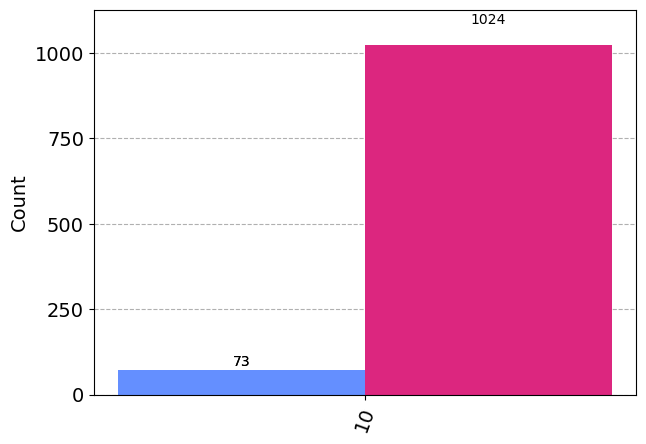

In [3]:
from qiskit.extensions import UnitaryGate
from qiskit.circuit.library import GroverOperator, QFT

# NOTE: the resource-expensive task happens in "spsolve()" in matrix exponential
# So I modify the code by adding a progress bar on the for loop in "spsolve()"
# it is around line 296 in linsolve.py, do it if you want to see the progress

n = 2
exp2_n = 2**n

# 1. Grover
qc = QuantumCircuit(n)
arr = [1] * exp2_n
arr[1] = -1
grover = QuantumCircuit(n)
grover.append(UnitaryGate(np.diag(arr)), range(n))
grover = GroverOperator(grover).decompose()
qc = QuantumCircuit(n)
qc.h(range(n))
for _ in range(max(1, int((np.pi / (2 * np.arcsin(1 / np.sqrt(exp2_n))) - 1) / 2))):
    qc.compose(grover, inplace=True)

# 2. QFT
# qc = QuantumCircuit(n)
# qc.x(0)
# qc.compose(QFT(n).decompose(), inplace=True)
# qc.compose(QFT(n, inverse=True).decompose(), inplace=True)

# 2. Result of gate-based approach
gb_sol = GateBasedInterpreter()
adiab_sol = AdiabaticInterpreter(compress=Compress.no, transpile_to_two=True)
plot_histogram([adiab_sol.run(qc), gb_sol.run(qc)])